In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('Churn_Modelling.csv',index_col = 'RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
X = data.iloc[:,2:-1]
Y = data[['Exited']]

In [0]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [0]:
Y.head()

,Exited
RowNumber,
1,1
2,0
3,1
4,0
5,0


In [0]:
X = pd.get_dummies(X,drop_first = True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
X_test.shape


(2000, 11)

In [0]:
X_train.shape

(8000, 11)

In [0]:
Y_train.shape

(8000, 1)

In [0]:
import keras
#high level library using tensorflow

In [0]:
from keras.models import Sequential 
from keras.layers import Dense,Dropout

In [0]:
model = Sequential()
#what kind of model model
model.add(Dense(15,activation='relu',input_dim=11))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

#input dimensions  number is no.of features
#add layers


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 15)                180       
_________________________________________________________________
dropout_10 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                160       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 77        
_________________________________________________________________
dropout_12 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)                

In [0]:
h = model.fit(X_train,Y_train,epochs=50,batch_size=25,validation_split=0.2,verbose=1,shuffle=True)




Train on 6400 samples, validate on 1600 samples
Epoch 1/50





6400/6400 [==============================] - 11s 2ms/step - loss: 0.6871 - acc: 0.6916 - val_loss: 0.6320 - val_acc: 0.8019
Epoch 2/50
6400/6400 [==============================] - 1s 174us/step - loss: 0.6116 - acc: 0.7941 - val_loss: 0.5875 - val_acc: 0.8019
Epoch 3/50
6400/6400 [==============================] - 1s 176us/step - loss: 0.5671 - acc: 0.7958 - val_loss: 0.5140 - val_acc: 0.8019
Epoch 4/50
6400/6400 [==============================] - 1s 174us/step - loss: 0.4943 - acc: 0.7962 - val_loss: 0.4528 - val_acc: 0.8019
Epoch 5/50
6400/6400 [==============================] - 1s 178us/step - loss: 0.4652 - acc: 0.7962 - val_loss: 0.4299 - val_acc: 0.8019
Epoch 6/50
6400/6400 [==============================] - 1s 171us/step - loss: 0.4553 - acc: 0.8022 - val_loss: 0.4156 - val_acc: 0.8063
Epoch 7/50
6400/6400 [==============================] - 1s 170us/step - loss: 0.4474 - acc: 0.8058 - val_loss: 0.4137 - val_acc: 

In [0]:
model.evaluate(X_test,Y_test)

2000/2000 [==============================] - 0s 51us/step


[0.3593237636089325, 0.857]

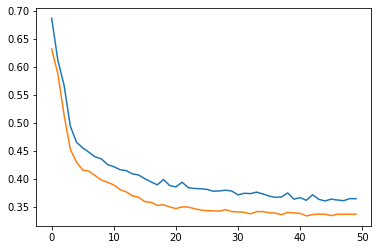

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

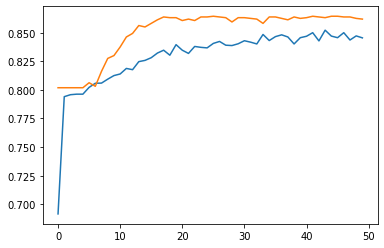

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])